In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df=pd.read_csv('Iris_model.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 6 columns):
Id               141 non-null int64
SepalLengthCm    141 non-null float64
SepalWidthCm     141 non-null float64
PetalLengthCm    141 non-null float64
PetalWidthCm     141 non-null float64
Species          141 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.7+ KB


In [55]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.drop(['Id'],axis=1,inplace=True)

In [57]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Pairplot to evaluate the distribution of species for different attributes

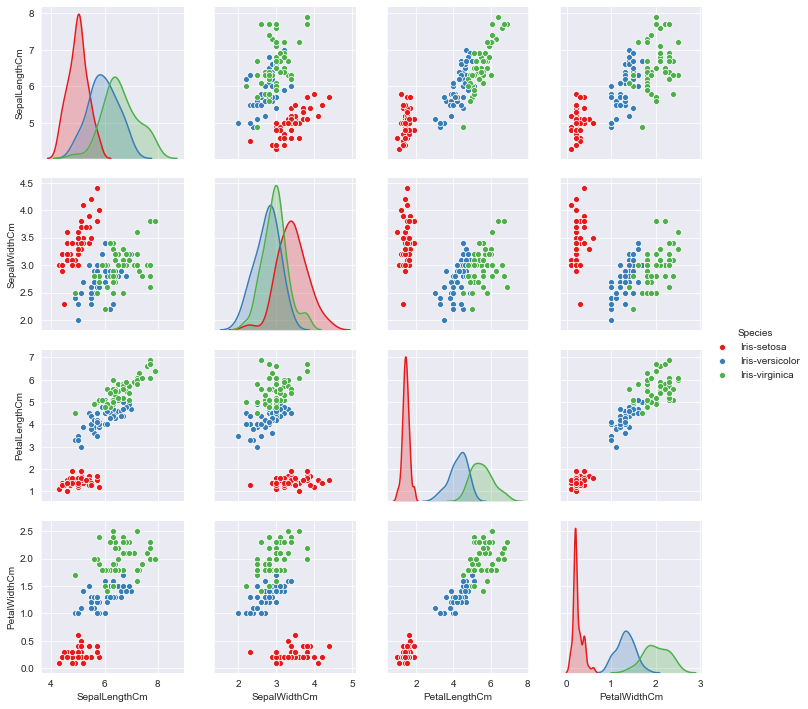

In [58]:
sns.set_style('darkgrid')
sns.pairplot(df,hue='Species',palette='Set1')
plt.show()

In [59]:
tf=df.copy()

In [60]:
tf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Adding a new column 'Target' of integer type to find the correlation matrix

In [61]:
tf['Target']=0
for i in range(len(tf.index)):
    if(tf['Species'][i]=='Iris-setosa'):
        tf['Target'][i]=0
    elif(tf['Species'][i]=='Iris-versicolor'):
        tf['Target'][i]=1
    elif(tf['Species'][i]=='Iris-virginica'):
        tf['Target'][i]=2

C:\Users\Pranit Pankaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Pranit Pankaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pranit Pankaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
tf.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
100,4.9,2.5,4.5,1.7,Iris-virginica,2
59,6.0,2.2,4.0,1.0,Iris-versicolor,1
58,5.0,2.0,3.5,1.0,Iris-versicolor,1
103,7.2,3.6,6.1,2.5,Iris-virginica,2
61,5.6,2.9,3.6,1.3,Iris-versicolor,1
0,5.1,3.5,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
138,6.5,3.0,5.2,2.0,Iris-virginica,2
136,6.7,3.0,5.2,2.3,Iris-virginica,2
140,5.9,3.0,5.1,1.8,Iris-virginica,2


In [63]:
tf.drop(['Species'],axis=1,inplace=True)

In [64]:
tf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Evaluate the correlation matrix for different attribute to 'Target' Column
##### PetalWidth and PetalLength is highly correlated to Target

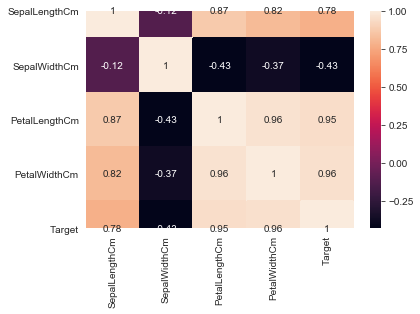

In [65]:
sns.heatmap(tf.corr(),annot=True)
plt.show()

## Train Test split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = tf.drop('Target',axis=1)
y = tf['Target']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dtree=DecisionTreeClassifier()

In [99]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
pred=dtree.predict(X_test)

## Evaluating metrics

In [101]:
dtree.score(X_test,y_test)

0.9767441860465116

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
print(confusion_matrix(y_test,pred))

[[12  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [104]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



## Graphical plotting of decision tree for above result

In [105]:
from sklearn.tree import plot_tree

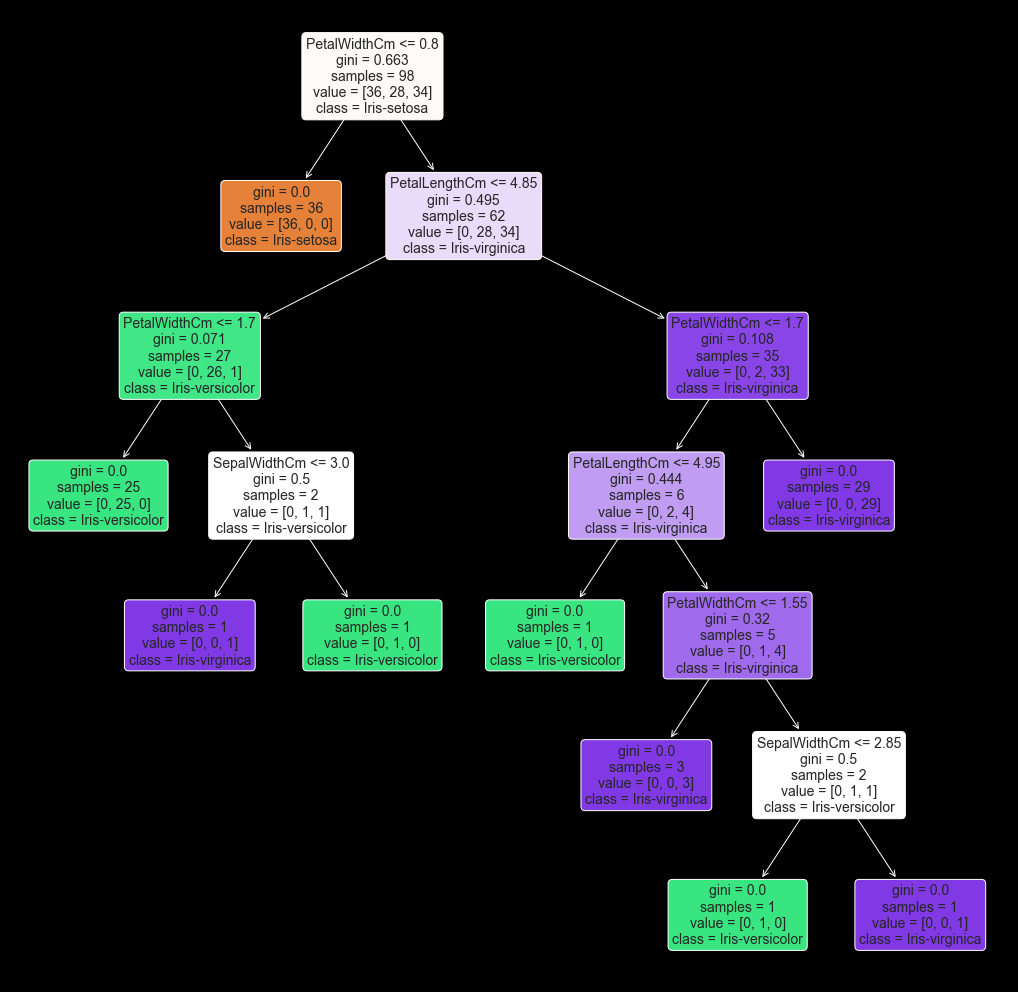

In [106]:
plt.figure(figsize=(18,18))
sns.set_style('darkgrid')
p=plot_tree(dtree,feature_names=X.columns,class_names=df['Species'].unique(),filled=True,rounded=True,fontsize=14)